In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('dataset3.csv')
df

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,1,30,3748,93,5,3500.00,121543.40,0.00,214,15,4,3
1,0,18,1,32,4598,9,12,900.00,1824.67,1933.75,175,13,1,2
2,0,0,1,26,5148,8,2,2400.00,2797.38,188.29,187,15,0,3
3,0,0,1,36,5179,20,12,2700.00,121543.40,0.00,187,2,0,2
4,0,0,1,46,3960,3,1,3100.00,2000.00,11010.65,189,15,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,1,9,1,53,8282,3,12,3500.00,121543.40,957.89,215,15,0,3
3748,1,0,1,47,5847,47,12,1388.25,11080.33,0.50,180,15,1,2
3749,1,0,1,31,3991,10,12,2100.00,3570.00,8567.67,200,15,0,3
3750,1,2,2,28,4995,9,12,1047.29,1129.65,1937.06,194,12,0,2


In [4]:
X= df.drop(['mora'], axis=1)
X.values

array([[235.,   1.,  30., ...,  15.,   4.,   3.],
       [ 18.,   1.,  32., ...,  13.,   1.,   2.],
       [  0.,   1.,  26., ...,  15.,   0.,   3.],
       ...,
       [  0.,   1.,  31., ...,  15.,   0.,   3.],
       [  2.,   2.,  28., ...,  12.,   0.,   2.],
       [ 51.,   2.,  33., ...,  20.,   2.,   2.]])

In [5]:
y = np.array(df['mora'])
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
X_entrenamiento, X_pruebas, y_entrenamiento, y_pruebas= train_test_split(X, y, test_size=0.3, random_state=100)

In [9]:
clasificador = svm.SVC(kernel='linear')


In [10]:
clasificador.fit(X_entrenamiento, y_entrenamiento)


SVC(kernel='linear')

In [26]:
X_entrenamiento.shape

(2626, 13)

In [28]:
y_entrenamiento.shape

(2626,)

In [11]:
y_prediccion = clasificador.predict(X_pruebas)

In [29]:
y_prediccion.shape

(1126,)

In [24]:
y_pruebas.shape

(1126,)

In [25]:
y_prediccion.shape

(1126,)

In [37]:
tn, fp, fn, tp = confusion_matrix(y_pruebas, y_prediccion).ravel()
(tn, fp, fn, tp)

(266, 205, 103, 552)

In [43]:
Exactitud = (tp+tn)/(tn+ fp+fn+tp)


In [44]:
Exhaustividad = tp/(tp+fn)


In [45]:
Precision = tp/(tp+fp)


In [46]:
print("Accuracy con funciones:", metrics.accuracy_score(y_pruebas, y_prediccion))
print("Accuracy calculado:", Exactitud)
print("Precision con funciones:", metrics.precision_score(y_pruebas, y_prediccion))
print("Precision calculado:", Precision)
print("Recall con funciones:", metrics.recall_score(y_pruebas, y_prediccion))
print("Exhaustividad calculado:", Exhaustividad)

Accuracy con funciones: 0.7264653641207816
Accuracy calculado: 0.7264653641207816
Precision con funciones: 0.7291941875825627
Precision calculado: 0.7291941875825627
Recall con funciones: 0.8427480916030534
Exhaustividad calculado: 0.8427480916030534


In [47]:
matriz_Confusion = pd.crosstab(y_pruebas, y_prediccion, rownames=['Actual'], colnames=['Predicción'])
matriz_Confusion

Predicción,0,1
Actual,,
0,266,205
1,103,552


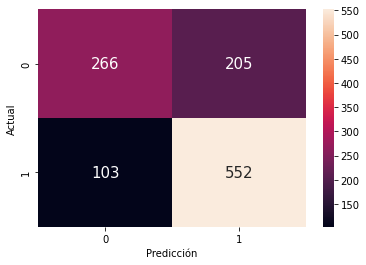

In [70]:
sn.heatmap(matriz_Confusion, annot=True, annot_kws={'size': 15}, fmt = "d")
plt.show()